
# Nicholas Barinaga
# Envormental Impact of Spanish Agriculture
# CPSC 222 Spring 2024

In [179]:
# Package Importation
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Introduction

---
## Domain
I have a paticular Interest in nature and things that grow. I also have a familial connection with Spain. I knew I wanted to study something relating to nature and agriculture excited me. To scope down my project I decided to qualify the scope to a single country, Spain. I felt that while many things impact carbon emission and pollution in a more general sense, that agriculture and livestock would have a paticular affect in emissions. The correlation between livestock production and emissions is perhaps to obvious and so I decided to focus on crop production.


---
## The Datasets
- For data on Spains agricultural production a data set was sourced from The Food and Agriculture Organization of the United Nations
- This source was very well documented which greatly aided in understanding attributes
- This source provided a tool for specifcying the range and scope of data to download

    - https://www.fao.org/faostat/en/#data/QCL

- For data on Spains emissions data was sourced from Our World In Data 

    - https://github.com/owid/co2-data

---
## Hypothesis


-   The production of a certain crops in Spain during a year have a direct impact on Spains carbon emissions for that year. There is a crop type which has a greatest level of effect on carbon emissions so that as that crop is produced in higher quanities, carbon emissions grow as a direct result.

## Classification Task

1.  


# Data Analysis


--- 
## Agriculture Data

- When collectng data for Spains agricultre the FOA provided a very useful tool for selecting data. One could greatly vary the topic and scope of the data. This tool was very valuable as rather than having to refine a large and poorly organized data set, I was able iterativly change the parameters of the download to suit the needs of the project. 

- The inital idea was to look at individual crops. The number of crops produced however made this unweilding, so a final data set was settled upon that collected crop croups under the attribute title "Item".

    - An item groups all crops into categoreis like cereal, fruits, vegetables, oil producing crops, etc. 

    - This change afforded a more apporpriate scope and although graunality is lost, I believe more meaningful patterns will emerge.


- Below shows an example of some of the more important attributes. Of paticular interests are the "Item" "Year" "Element" and "Value" of an instance.
    - "Element" refers to what is being measured, in this case production which is the total domestic production of crop both in and outside the agricultural sector.

    - "Item" refers to the type of crop as discussed previously

    - "Year" refers to the year in which the production was measured

    - "Value" refers to the observed production value of a the crop type in that given year

    - "Unit" denotes the unit that value of production is measured in: here it is (T) tonnes

In [180]:
# Small Example of agriculture data
crops_groups = pd.read_csv('./data/spain_crops_groups.csv')
display(crops_groups.iloc[:3, 5:])

,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,Production,F1717,"Cereals, primary",1961,1961,t,7501313.0,A,Official figure,NaN
1,Production,F1717,"Cereals, primary",1962,1962,t,9274378.0,A,Official figure,NaN
2,Production,F1717,"Cereals, primary",1963,1963,t,9418967.0,A,Official figure,NaN


---
## Carbon Emissions Data

- This Data set was first found from an article from Our World In Data. The dataset was downloaded from Our World In Data's Co2 and Greenhouse Gas Emissions Database. This data has many attributes with many similar names. To better understand the attributes and importance to project documentation connected to the data set was consulted.

- While this database provideds information on many forms of emissions, carbon dioxide emissions was the focus of this project.  

- Below smalls a small portion of the data set. Of paticular interest are the "country", "year", and "co2_including_luc"
    - "country" refers to the country to which the instance belongs

    - "year" indicates the year in which the measurement was taken

    - "co2_including_luc" is define by the dataset documentation as "Annual CO₂ emissions including land-use change - Annual total emissions of carbon dioxide (CO₂), including land-use change, measured in million tonnes"
        - land-use change is the process by which humans shape and alter land to fit specific needs. Cleary agriculture is a major source of land use change as wilded areas are doemsticated to faciliate mass production of crops while other areas may be rewilded. These land use change events include deforestation for the purpose of agricultural production. This deforestation has a great impact on the earths carbon capturing ability. For these reasons this metric is the most pertanted to our study.




In [181]:
# Small Example of carbon emissons data with most attributes hidden
carbon_emissions = pd.read_csv('./data/carbon_emissions.csv')
display(carbon_emissions.iloc[41200:41204, :11])

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc
41200,Spain,1890,ESP,17749968.0,4.373549e+10,NaN,NaN,7.339,0.517,7.573,24.608
41201,Spain,1891,ESP,17834434.0,4.475052e+10,NaN,NaN,7.940,0.601,8.188,27.735
41202,Spain,1892,ESP,17916684.0,4.871361e+10,NaN,NaN,8.299,0.359,4.522,29.551
41203,Spain,1893,ESP,17996694.0,4.684359e+10,NaN,NaN,8.119,-0.180,-2.163,30.338


---

## Data Preperation

### Preparing the crop data

- Three primary areas of concern arose when preparing the crop data.
    
    1. The dataframe was formatted in way that made accessing values difficult and need to be reorganized and simplified.
    2. The value of production for Fibre Crops in the years of 1998 and 1999 were outliers
    3. The "Value" attribute was missing for three crop types between the years 2018-2022


- Something important to note is that the crop data is mesured in tonnes while the emission data is measured in millions of tonnes. This means the values are not formatted the same. To solve this at times I kept the crop data standardized and at another time changed it to be measured in millions of tonnes as well. In the end however, I decided to leave the data as it was. The python tools implemented for the study automaticlly normalized the crop data and so manual manipulation was not neccesary.

## Issue 1

- Each instance had its "Element", "Item", "Year", "Value" as record belong to an instance. This meant that for every "Item" (crop type) there would be an instance of each year, thus there were multiple instances of every year. The ideal format would have only one instance for each year and each individual crop type would an attribute, in which the "Value" of the "Element" (production) would be stored. 
    
- The solution to this problem was to shift the axes of many parts of the data frame. The new data frame (example below)
    - For each column of a crop type the value represents the production value for that year in tonnes
    - While most of the crop types are self explanatory some need clarification
        - Oilcrops are crops that produce oil and there is a great variety of oil crops which can be harvested in different ways. For this reason many but not all oil producing crops are either aggregated to oil equivilant or cake equivilant. Oil cake is the resedue left over of a crop after extracting oil. Some oil producing crops such as dessert and table nuts are actually listed under the nuts category rather than as oil crops.
        - Examples of Roots and Tubers include: potatos, onions, carrots, turnips, etc.
        - Examples of Pulses include:Peas, Lentils, Beans, etc. 

In [182]:
# Crops data after making shift
crops_by_groups = pd.read_csv('./data/crops_by_group.csv')
display(crops_by_groups.iloc[:3, 1:])

,Year,Cereal,Citrus Fruits,Fibre,Fruit,Vegetables,Sugar Crops,"Oilcrops, Cake","Oilcrops, Oil",Pulses,Roots and Tubers,Treenuts
0,1961,7501313.0,1963100.0,125501.0,8056170.0,5135084.0,4668000.0,123085.0,454410.81,705227.0,5033925.0,337261.0
1,1962,9274378.0,1411000.0,135918.0,7842627.0,5088416.0,3843000.0,131119.0,408366.28,755270.0,4263018.0,237906.0
2,1963,9418967.0,2087300.0,113091.0,9093705.0,5315694.0,3048000.0,112455.0,728444.63,750300.0,5184266.0,269686.0


#### Issue 2

- The value produced for fibre crops in the years of 1998 and 1999 were tested using z scores and had a value greater than 3, thus they are outliers in the data.

- The solution here was to make a decision: the outliers would not be altered or removed from the data. The data is yearly measurements of the overall production of each crop category for every year. The nature of this data frame would mean that removing outliers would be removing enitre years worth of data. In addition this data is simply recorindg the observed production value of each crop, if in a specific year a disproportionate amount of one crop was produced that data isn't neccisarliy incorrect. Though it may cause issues later when developing the model the decision was made to keep these outliers.

#### Issue 3

- There were no values of production amount for Fibre crops, oil producing crops, or oil cake crops between the years 2018-2019

- To solve this issue two methods were developed. The first was effort was to train linear regression models for each category using the data from the five years before the missing data (2013-2017). Perhaps only using five years created an issues because the models were not producing satisfactory or "beleivable" results for the missing years' data.

- When this first solution failed to generate data that would "fit" another method was devloped. The second method was to take the mean of the five previous years for each crop type to generate a single year's production value. This process was repeated for every year. This means that the imputed data was being using to imput more data. 
    - 2018 was produced using 2013, 2014, 2015, 2016, 2017.
    - 2019 was produced using 2014, 2015, 2016, 2017, 2018 (the previously imputed val).
    - this was repeated for up to the year 2022.

- While it may be a cause for concern that imputed data was being used to imput other data, this method was perferable as it unlike the first method the outlier data for fibre crops (the years 1998-1999) had no impact on the imputations. The main reason this method was perfered was simply because the data produced did not greatly vary from the "real" instances before and after and continued the general trend that the "real" data was following.

 ### Preparing the emissions data

- This data set did not need much alteration before merging. Many of the changes were relating to scoping the data to size that would be perferable to use in conjunction with the crop data

    - All instaces pertaining to countries other than Spain were dropped.

    - Attributes with 30% or more of its data missing were removed.

    - Further all attributes outside of 'country','year', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct' were dropped. The classifer for this study is co2_including_luc, however these other attributes were interesting variations on that data and at this point in the study I was still considering exploring at them. Later these attributes would be dropped leaving only our original classifer 'co2_including_luc'

    
    - Lastly all instances that belonged to years before 1961 were dropped. This was to match the emissions data with the available years of crop data
 

In [183]:
# Small example of emissions data before merging
emissions_before_merge = pd.read_csv('./data/emissions_before_merge.csv')
display(emissions_before_merge.loc[0:5, :])

,Unnamed: 0,country,Year,co2_including_luc
0,41271,Spain,1961,71.444
1,41272,Spain,1962,70.795
2,41273,Spain,1963,60.300
3,41274,Spain,1964,67.304
4,41275,Spain,1965,62.890
5,41276,Spain,1966,95.020


### Merging the data

- The data sets were merged using the "Year attribute" to create a working data set with which exploration could be carried out.
- Now with this data frame each instance represents a single year in which we can find the production in tonnes of each crop category and the co2 emissions in millions of tonnes. As mentioned previously at times the crop data was manually standardized and at other times made to be match the co2 data by measuring in millions of tonnes rather than only tonnes. The python features utilized for exploration and model creation automaticly normalized the crop data and so it became uneccesary to first standardize or change the measurement scale of my data before training models with it.

In [184]:
# Small example of working data set
df = pd.read_csv('./data/workingData.csv')
display(df.iloc[:3, 1:])

,country,Year,co2_including_luc,Cereal,Citrus Fruits,Fibre,Fruit,Vegetables,Sugar Crops,"Oilcrops, Cake","Oilcrops, Oil",Pulses,Roots and Tubers,Treenuts
0,Spain,1961,71.444,7501313.0,1963100.0,125501.0,8056170.0,5135084.0,4668000.0,123085.0,454410.81,705227.0,5033925.0,337261.0
1,Spain,1962,70.795,9274378.0,1411000.0,135918.0,7842627.0,5088416.0,3843000.0,131119.0,408366.28,755270.0,4263018.0,237906.0
2,Spain,1963,60.300,9418967.0,2087300.0,113091.0,9093705.0,5315694.0,3048000.0,112455.0,728444.63,750300.0,5184266.0,269686.0


---

## Exploratory data analysis

- Exploration involved creating a series of scatter plots. Each plot had the classifer, co2, on the y axis and one of the crop types on the x axis.

- In this first visualization step Cereal, Fruit, Vegetables, and Pulses stood out as having the strongest correlations with co2 emissions. Below is shown the scatter plots for Fruit, Vegetables, and also co2 graphed by year. These are both rather strong positive correlations and it is even more interesting to note the similarity in the vegetable scatter plot and co2 plotted by year. 




<Axes: xlabel='Year', ylabel='co2_including_luc'>

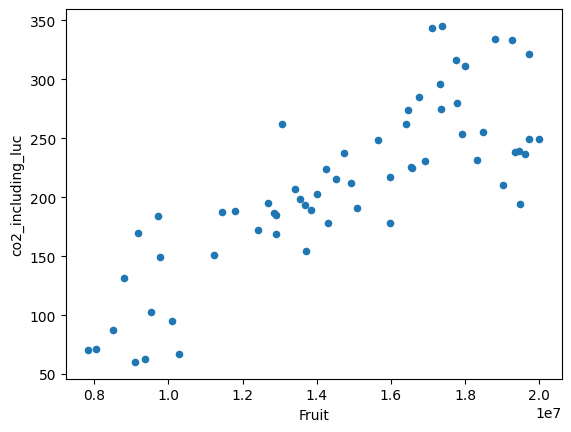

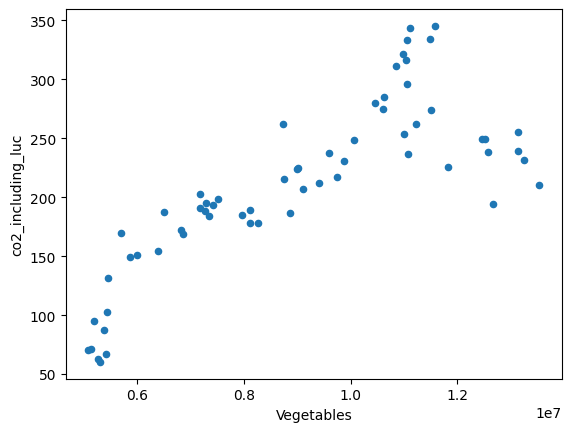

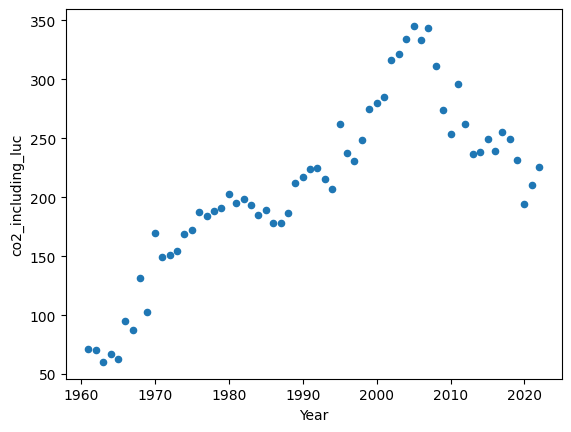

In [185]:
# Scatter plots for vegetables, fruit, and by year
df.plot.scatter(y='co2_including_luc', x='Fruit')
df.plot.scatter(y='co2_including_luc', x='Vegetables')
df.plot.scatter(y='co2_including_luc', x='Year')

- To narrow down the scope to just two attributes was difficult, but creating quick linear regression models for fruit, pulses, vegetables, and cerael produced the following metrics. Though these tests were rather rudementry and not performed with any cross validation it gave early indications that Vegetables and Fruit had more potential as attributes for predicting co2 emissions. (These values were generated using test data)

    - Vegetables
        - MSE = 1243.9105018745656
        - MAE = 30.472561501616806
        - R-squared = 0.4794372632136844

    - Fruit
        - MSE = 1188.2469498447635
        - MAE = 29.885173748160902
        - R-squared = 0.5027318418350676

    - Pulses
        - MSE = 5749.080138601919
        - MAE = 62.43074339606418
        - R-squared = -1.4059262193255857

    - Cereal 
        - MSE = 2323.8622758088763
        - MAE = 40.34525247645582
        - R-squared = 0.027489434017552217

---

##### Experiment with proption

- Throughout much of the project the idea of creating enriching the data by creating new attributes kept presenting itself to me. Eventually I decided test the idea. The idea was to take the value of each crop types production for every year and divide it by the total productin value of all crops, thus creating a precentage value of that crops production out of all crop production. The idea was that perhaps this attribute would actually carry more information with it. It would not just be a raw value of production but the attribute would now also communicate the values of the "other" crops as well. Below are the metrics generated from a simple second degree polynomial regression model of vegetables and co2 output, as well as a second degree polynomial modeling the precentage or proportion of vegetables compared to all other crops against co2 emissions.

- Second degree polynomial modeling vegetable production against co2 emissions

    - MSE = 1834.7589675181894
    - MAE = 33.68383192962836
    - R-squared = 0.6404335376159729

- Second degree polynomial modeling proportion of vegetable production out of all crop production against co2 emissions

    - MSE = 1832.3830609387267
    - MAE = 33.64320055407683
    - R-squared = 0.6408991553558813
    
     

- It is clear from the above values that this expirment proved to be needless and although I do not regret testing this approach the efforts were abandoned after these tests.

---

## Statisical Analysis

- After the data had been explored utilizing visualizations and metrics such as MSE, it was determined that more sophisitcated forms of regressin and evaluation would be conducted using the "Fruit"  and "Vegetables" attributes. Linear and polynomial regression models tested using both 10 fold cross validation and leave one out cross validation provided valuable information when considering the final model to be implemented. The scores for linear and polynomial regression are below and for example sake one regression model is displayed for both fruit based and vegetable based models.


    ### Regression results (measured in negative mean squared error)

    #### Fruit based regressions 

    - Linear Regression scores 

        - 10 fold cross validation = 1905.5204011325363
        - Leave one out cross validation = 1952.2983944636662

    - Polynomial Regression degree 2 scores

        - 10 fold cross validation = 1725.9269530503764
        - Leave one out cross validation = 1777.6287400090173

    - Polynomial Regression degree 3 scores

        - 10 fold cross validation = 1688.4329160571374
        - Leave one out cross validation = 1732.902126482011

    #### Vegetable based regression

    - Linear Regression scores 

        - 10 fold cross validation = 2167.7153372667626
        - Leave one out cross validation = 2236.897707952948

    - Polynomial Regression degree 2 scores

        - 10 fold cross validation = 1168.0394190831926
        - Leave one out cross validation = 1163.40251366772

    - Polynomial Regression degree 3 scores

        - 10 fold cross validation = 1103.4197710091134
        - Leave one out cross validation = 1087.7483828596326
    
    #### Multiple based regression using both vegetable and fruit

    - Linear Regression scores 

        - 10 fold cross validation = 1918.2758827315424
        - Leave one out cross validation = 2029.6336312562075

    - Polynomial Regression degree 2 scores

        - 10 fold cross validation = 1273.0696345353342
        - Leave one out cross validation = 1221.7889558766985

    - Polynomial Regression degree 3 scores

        - 10 fold cross validation = 1368.2500074298428
        - Leave one out cross validation = 1375.3592041736888



---


##### Example of linear regression in fruit based model

Text(0, 0.5, 'Co2 (millions of tons)')

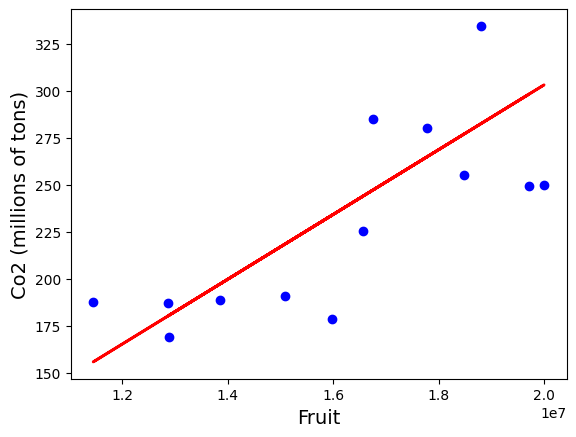

In [186]:

test_p = .2
seed = 123

X = df[['Fruit']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

linModel = LinearRegression()
linModel.fit(X_train,y_train)
y_pred = linModel.predict(X_test)


plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Fruit', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)

---


##### Example of second degree polynomial regression in vegetable based model

Text(0, 0.5, 'Co2 (millions of tons)')

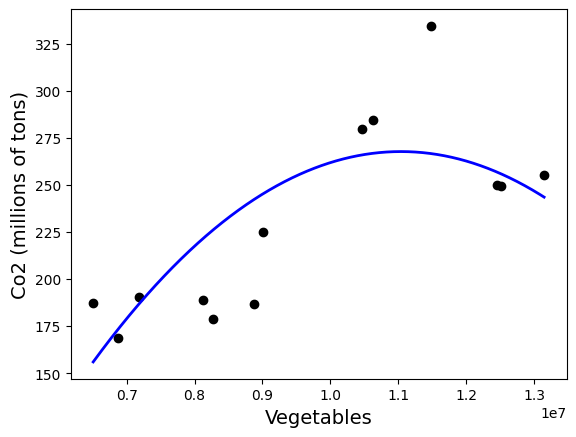

In [187]:

test_p = .2
seed = 123

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
xPoly = polyFeatures.fit_transform(X_train.reshape(-1, 1))
polyModel = LinearRegression().fit(xPoly, y_train)
poly_test = polyFeatures.fit_transform(X_test.reshape(-1, 1))
y_pred = polyModel.predict(poly_test)

plt.scatter(X_test, y_test, color='black')
xDelta = np.linspace(X_test.min(), X_test.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Co2 (millions of tons)', fontsize=14)


### Interpretation of regression tests

- The above test scores helped determining that a soley vegetable based model had the most potenital. Of all the scores the best was about 1087.75. This test score came from leave one out cross validation on a third degree polynomial model using "Vegetables" as the input attribute. After reviewing the tests results it is clear that models going forward should consider using vegetables as the input attribute by which to predict our classifer, co2. Though this level of exploration may have been satisfying to for discerning the correct basis for a future model more analysis was undertaken. 

- The next step was to test multiple vegetable based polynomial regression models to determine which degree produced best metrics while not overfitting the data. Below shows a graph comparing the performance of multiple polynomial regression models in a vegetable base model. Clearly a model of the second degree produces the smallest average MSE metric while not overfitting the data. The improvment gained by increasing to the third degree is minimal and therefore not ideal. This is interesting however in the final model this step of analysis could prove irrelevant.

Text(0, 0.5, 'Mean squared error')

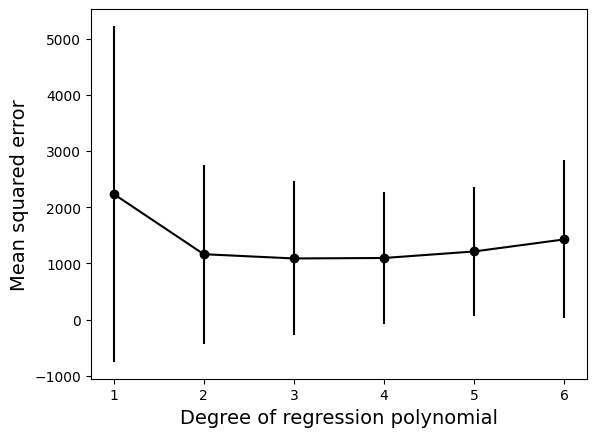

In [188]:

cvMeans = []
cvStdDev = []

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

for i in range(1, 7):
    # Fit a degree i polynomial regression model
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X_train)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y_train)

    polyscore = -cross_val_score(
        polyModel, XPoly, y_train, scoring='neg_mean_squared_error', cv=49
    )

    # Store the mean and standard deviation of the 10-fold cross-validation for the degree i polynomial regression model
    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)

---

# Classification Results

- As the nature of the data in this project is numerical and was not altered to accomidate classification the decision of what model to implement was rather a simple one. A K-nearest neighbors model would accomadate the numerical nature of the data while providing a more sophisisticated model than simple ploynomial regression. The results of the previous efforts had also confirmed that the paramter for this model ought to soley be based on the attribute "Vegetables".


- Below are is a graph measuring the results of cross validation proccesses being carried out on Knn model with the K paramter equal to 2.

([<matplotlib.axis.XTick at 0x7f174c8f15b0>,
 [Text(0, 0, '10-fold'), Text(1, 0, 'LOOCV')])

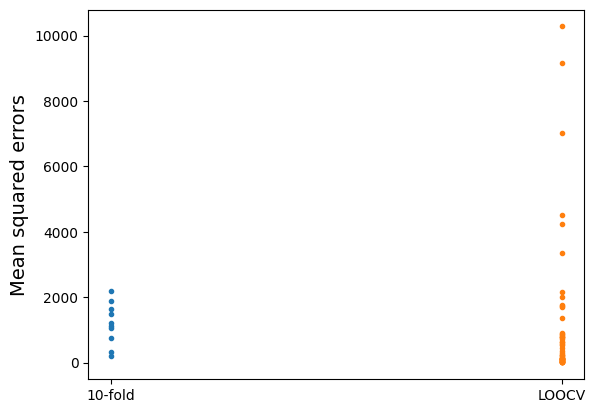

In [189]:

seed = 123
test_p = 0.2

X = df[['Vegetables']].values.reshape(-1, 1)
y = df[['co2_including_luc']].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=test_p, random_state=seed
)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

knnModel = KNeighborsRegressor(n_neighbors=2)
knnModel.fit(X_train, np.ravel(y_train))
y_pred = knnModel.predict(X_test)

ten_fold_scores = -cross_val_score(
    knnModel, X_train, y_train, scoring='neg_mean_squared_error', cv=10
)

LOOCV_scores = -cross_val_score(knnModel, X_train, y_train, scoring='neg_mean_squared_error', cv=49)

plt.plot(np.zeros_like(ten_fold_scores), ten_fold_scores, '.')
plt.plot(np.zeros_like(LOOCV_scores) + 1, LOOCV_scores, '.')
plt.ylabel('Mean squared errors', fontsize=14)
plt.xticks([0, 1], ['10-fold', 'LOOCV'])